<a href="https://colab.research.google.com/github/avaniishh123/-6companies30days-/blob/main/COE_Internship_DL_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install torch torchvision kagglehub --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 78.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 63.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 41.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 97.9 MB/s eta 0:00:00


In [ ]:
import kagglehub

# Download dataset
path = kagglehub.dataset_download("debeshjha1/kvasirseg")
print("Dataset Path:", path)

# Check files
import os
for root, dirs, files in os.walk(path):
    print("📂", root)
    for d in dirs:
        print("  📁", d)
    for f in files[:3]:
        print("  📄", f)
    print()

100%|██████████| 144M/144M [00:04<00:00, 36.6MB/s]

Extracting files...


Dataset Path: /root/.cache/kagglehub/datasets/debeshjha1/kvasirseg/versions/3
📂 /root/.cache/kagglehub/datasets/debeshjha1/kvasirseg/versions/3
  📁 Kvasir-SEG
  📄 val.txt
  📄 README.md
  📄 train.txt

📂 /root/.cache/kagglehub/datasets/debeshjha1/kvasirseg/versions/3/Kvasir-SEG
  📁 Kvasir-SEG

📂 /root/.cache/kagglehub/datasets/debeshjha1/kvasirseg/versions/3/Kvasir-SEG/Kvasir-SEG
  📁 masks
  📁 annotated_images
  📁 bbox
  📁 images
  📄 1911.07069.pdf

📂 /root/.cache/kagglehub/datasets/debeshjha1/kvasirseg/versions/3/Kvasir-SEG/Kvasir-SEG/masks
  📄 cju8b6rp0r5st0850184f79xt.jpg
  📄 cju2i3hzclw3o0988rrgh911i.jpg
  📄 cju18gzrq18zw0878wbf4ftw6.jpg

📂 /root/.cache/kagglehub/datasets/debeshjha1/kvasirseg/versions/3/Kvasir-SEG/Kvasir-SEG/annotated_images
  📄 cju8b6rp0r5st0850184f79xt.jpg
  📄 cju2i3hzclw3o0988rrgh911i.jpg
  📄 cju18gzrq18zw0878wbf4ftw6.jpg

📂 /root/.cache/kagglehub/datasets/debeshjha1/kvasirseg/versions/3/Kvasir-SEG/Kvasir-SEG/bbox
  📄 cju1d96gsv62d09881b3wecw2.csv
  📄 cju6vvb8svhe

In [ ]:
from torchvision import transforms

# Image and mask transforms
image_transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor(),
    transforms.Normalize([0.5], [0.5])
])

mask_transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor()  # No normalization for masks
])

In [ ]:
from torch.utils.data import Dataset
from PIL import Image

class KvasirDataset(Dataset):
    def __init__(self, image_dir, mask_dir):
        self.image_dir = image_dir
        self.mask_dir = mask_dir
        self.images = sorted(os.listdir(image_dir))
        self.masks = sorted(os.listdir(mask_dir))

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        img = Image.open(os.path.join(self.image_dir, self.images[idx])).convert("RGB")
        mask = Image.open(os.path.join(self.mask_dir, self.masks[idx])).convert("L")

        img = image_transform(img)
        mask = mask_transform(mask)
        mask = (mask > 0.5).float()  # Binary mask

        return img, mask

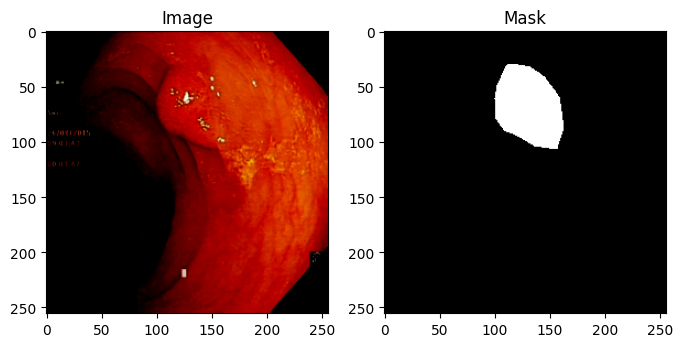

In [ ]:
from torch.utils.data import DataLoader

image_dir = os.path.join(path, "Kvasir-SEG/Kvasir-SEG/images")
mask_dir  = os.path.join(path, "Kvasir-SEG/Kvasir-SEG/masks")

dataset = KvasirDataset(image_dir, mask_dir)
loader = DataLoader(dataset, batch_size=4, shuffle=True)

# Show a sample
import matplotlib.pyplot as plt
import numpy as np

images, masks = next(iter(loader))
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.imshow(np.transpose(images[0], (1,2,0)))
plt.title("Image")
plt.subplot(1,2,2)
plt.imshow(masks[0][0], cmap='gray')
plt.title("Mask")
plt.show()

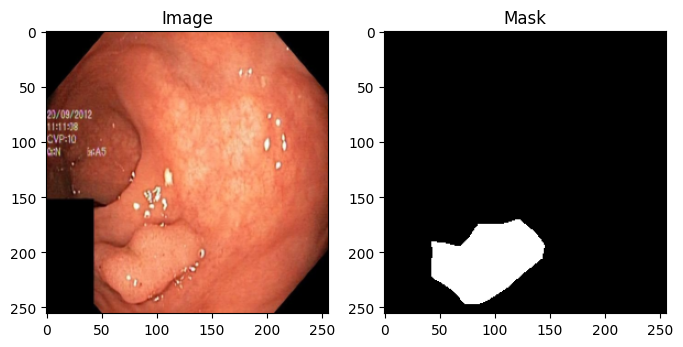

In [ ]:
# Denormalize image for visualization (from [-1,1] to [0,1])
def denormalize(image):
    return (image * 0.5) + 0.5  # Since we normalized using [0.5,0.5]

# Show a sample
images, masks = next(iter(loader))
img = images[0].detach().numpy()
img = np.transpose(img, (1, 2, 0))
img = denormalize(img)

plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.imshow(img)
plt.title("Image")
plt.subplot(1,2,2)
plt.imshow(masks[0][0], cmap='gray')
plt.title("Mask")
plt.show()


In [ ]:
import torch.nn as nn
import torch

class ExtendedUNet(nn.Module):
    def __init__(self):
        super().__init__()

        def conv_block(in_c, out_c):
            return nn.Sequential(
                nn.Conv2d(in_c, out_c, 3, padding=1),
                nn.BatchNorm2d(out_c),
                nn.ReLU(inplace=True),
                nn.Conv2d(out_c, out_c, 3, padding=1),
                nn.BatchNorm2d(out_c),
                nn.ReLU(inplace=True)
            )

        self.enc1 = conv_block(3, 64)
        self.enc2 = conv_block(64, 128)
        self.enc3 = conv_block(128, 256)
        self.enc4 = conv_block(256, 512)
        self.pool = nn.MaxPool2d(2)
        self.middle = conv_block(512, 1024)

        self.up4 = nn.ConvTranspose2d(1024, 512, 2, stride=2)
        self.dec4 = conv_block(1024, 512)
        self.up3 = nn.ConvTranspose2d(512, 256, 2, stride=2)
        self.dec3 = conv_block(512, 256)
        self.up2 = nn.ConvTranspose2d(256, 128, 2, stride=2)
        self.dec2 = conv_block(256, 128)
        self.up1 = nn.ConvTranspose2d(128, 64, 2, stride=2)
        self.dec1 = conv_block(128, 64)

        self.out = nn.Conv2d(64, 1, 1)

    def forward(self, x):
        e1 = self.enc1(x)
        e2 = self.enc2(self.pool(e1))
        e3 = self.enc3(self.pool(e2))
        e4 = self.enc4(self.pool(e3))
        m = self.middle(self.pool(e4))
        d4 = self.dec4(torch.cat([self.up4(m), e4], dim=1))
        d3 = self.dec3(torch.cat([self.up3(d4), e3], dim=1))
        d2 = self.dec2(torch.cat([self.up2(d3), e2], dim=1))
        d1 = self.dec1(torch.cat([self.up1(d2), e1], dim=1))
        return torch.sigmoid(self.out(d1))


In [ ]:
import torch.nn.functional as F

# Dice Loss
def dice_loss(pred, target, smooth=1e-5):
    pred = pred.view(-1)
    target = target.view(-1)
    intersection = (pred * target).sum()
    return 1 - (2.*intersection + smooth) / (pred.sum() + target.sum() + smooth)

# Combined Loss: BCE + Dice
def combined_loss(pred, target):
    bce = F.binary_cross_entropy(pred, target)
    dsc = dice_loss(pred, target)
    return bce + dsc


In [ ]:
import torch
import time

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("✅ Using Device:", device)

model = ExtendedUNet().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)

# Training loop
epochs = 5  # Start with small epochs for testing

for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    start = time.time()

    for i, (images, masks) in enumerate(loader):
        images = images.to(device)
        masks = masks.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = combined_loss(outputs, masks)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        if (i+1) % 10 == 0:
            print(f"Epoch [{epoch+1}/{epochs}], Step [{i+1}/{len(loader)}], Loss: {loss.item():.4f}")

    avg_loss = running_loss / len(loader)
    print(f"✅ Epoch {epoch+1} Completed — Avg Loss: {avg_loss:.4f} — Time: {time.time()-start:.2f}s\n")

✅ Using Device: cuda
Epoch [1/5], Step [10/250], Loss: 1.2230
Epoch [1/5], Step [20/250], Loss: 1.4920
Epoch [1/5], Step [30/250], Loss: 1.2271
Epoch [1/5], Step [40/250], Loss: 1.1834
Epoch [1/5], Step [50/250], Loss: 1.0696
Epoch [1/5], Step [60/250], Loss: 1.1336
Epoch [1/5], Step [70/250], Loss: 1.3341
Epoch [1/5], Step [80/250], Loss: 1.3407
Epoch [1/5], Step [90/250], Loss: 1.3082
Epoch [1/5], Step [100/250], Loss: 1.0872
Epoch [1/5], Step [110/250], Loss: 0.9718
Epoch [1/5], Step [120/250], Loss: 0.9553
Epoch [1/5], Step [130/250], Loss: 1.1815
Epoch [1/5], Step [140/250], Loss: 0.8884
Epoch [1/5], Step [150/250], Loss: 1.1866
Epoch [1/5], Step [160/250], Loss: 1.1644
Epoch [1/5], Step [170/250], Loss: 1.1372
Epoch [1/5], Step [180/250], Loss: 0.9903
Epoch [1/5], Step [190/250], Loss: 0.9529
Epoch [1/5], Step [200/250], Loss: 1.0432
Epoch [1/5], Step [210/250], Loss: 0.9469
Epoch [1/5], Step [220/250], Loss: 1.0854
Epoch [1/5], Step [230/250], Loss: 0.8851
Epoch [1/5], Step [240

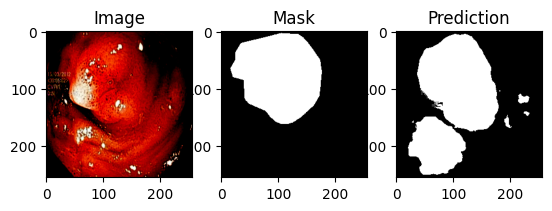

In [ ]:
model.eval()
with torch.no_grad():
    img, mask = dataset[0]
    img = img.unsqueeze(0).to(device)
    output = model(img).squeeze().cpu().numpy()

plt.subplot(1,3,1); plt.imshow(np.transpose(img.squeeze().cpu().numpy(), (1,2,0))); plt.title("Image")
plt.subplot(1,3,2); plt.imshow(mask.squeeze().numpy(), cmap='gray'); plt.title("Mask")
plt.subplot(1,3,3); plt.imshow(output > 0.5, cmap='gray'); plt.title("Prediction")
plt.show()


In [ ]:
import torch.nn.functional as F
from scipy.ndimage import binary_opening

def postprocess_mask(pred, threshold=0.5):
    pred = (pred > threshold).float()
    # Optional: remove small blobs
    pred = pred.cpu().numpy()
    for i in range(pred.shape[0]):
        pred[i,0] = binary_opening(pred[i,0], structure=np.ones((3,3)))
    return torch.tensor(pred)


In [ ]:
with torch.no_grad():
    outputs = model(images)
    outputs = postprocess_mask(outputs)


In [ ]:
from torch.utils.data import random_split

# Split dataset: 80% train, 20% val
train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size

train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

train_loader = DataLoader(train_dataset, batch_size=2, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=2, shuffle=False)


In [ ]:
def dice_coeff(pred, target, smooth=1e-5):
    pred = pred.view(-1)
    target = target.view(-1)
    intersection = (pred * target).sum()
    return (2.*intersection + smooth) / (pred.sum() + target.sum() + smooth)

def iou_score(pred, target, smooth=1e-5):
    pred = pred.view(-1)
    target = target.view(-1)
    intersection = (pred * target).sum()
    union = pred.sum() + target.sum() - intersection
    return (intersection + smooth) / (union + smooth)


In [ ]:
for epoch in range(epochs):
    model.train()
    train_loss = 0.0
    for images, masks in train_loader:
        images, masks = images.to(device), masks.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = combined_loss(outputs, masks)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()

    train_loss /= len(train_loader)

    # Validation
    model.eval()
    val_loss = 0.0
    dice_total = 0.0
    iou_total = 0.0
    with torch.no_grad():
        for images, masks in val_loader:
            images, masks = images.to(device), masks.to(device)
            outputs = model(images)
            loss = combined_loss(outputs, masks)
            val_loss += loss.item()
            preds = (outputs > 0.5).float()
            dice_total += dice_coeff(preds, masks).item()
            iou_total += iou_score(preds, masks).item()

    val_loss /= len(val_loader)
    avg_dice = dice_total / len(val_loader)
    avg_iou = iou_total / len(val_loader)

    print(f"✅ Epoch {epoch+1}/{epochs} — Train Loss: {train_loss:.4f} — Val Loss: {val_loss:.4f} — Dice: {avg_dice:.4f} — IoU: {avg_iou:.4f}")

✅ Epoch 1/5 — Train Loss: 0.6772 — Val Loss: 0.7281 — Dice: 0.5941 — IoU: 0.4664
✅ Epoch 2/5 — Train Loss: 0.6052 — Val Loss: 0.6076 — Dice: 0.6941 — IoU: 0.5579
✅ Epoch 3/5 — Train Loss: 0.5635 — Val Loss: 0.5739 — Dice: 0.7013 — IoU: 0.5706
✅ Epoch 4/5 — Train Loss: 0.5056 — Val Loss: 0.5438 — Dice: 0.7249 — IoU: 0.5923
✅ Epoch 5/5 — Train Loss: 0.4810 — Val Loss: 0.5331 — Dice: 0.7394 — IoU: 0.6102


In [ ]:
from torch.autograd import Function

class GradientReversal(Function):
    @staticmethod
    def forward(ctx, x, lambda_):
        ctx.lambda_ = lambda_
        return x.view_as(x)

    @staticmethod
    def backward(ctx, grad_output):
        return -ctx.lambda_ * grad_output, None

def grad_reverse(x, lambda_=1.0):
    return GradientReversal.apply(x, lambda_)


In [ ]:
class DANNUNet(nn.Module):
    def __init__(self):
        super().__init__()

        # Your U-Net encoder + decoder
        def conv_block(in_c, out_c):
            return nn.Sequential(
                nn.Conv2d(in_c, out_c, 3, padding=1),
                nn.BatchNorm2d(out_c),
                nn.ReLU(inplace=True),
                nn.Conv2d(out_c, out_c, 3, padding=1),
                nn.BatchNorm2d(out_c),
                nn.ReLU(inplace=True)
            )

        self.enc1 = conv_block(3, 64)
        self.enc2 = conv_block(64, 128)
        self.enc3 = conv_block(128, 256)
        self.enc4 = conv_block(256, 512)
        self.pool = nn.MaxPool2d(2)
        self.middle = conv_block(512, 1024)

        self.up4 = nn.ConvTranspose2d(1024, 512, 2, stride=2)
        self.dec4 = conv_block(1024, 512)
        self.up3 = nn.ConvTranspose2d(512, 256, 2, stride=2)
        self.dec3 = conv_block(512, 256)
        self.up2 = nn.ConvTranspose2d(256, 128, 2, stride=2)
        self.dec2 = conv_block(256, 128)
        self.up1 = nn.ConvTranspose2d(128, 64, 2, stride=2)
        self.dec1 = conv_block(128, 64)

        self.seg_head = nn.Conv2d(64, 1, 1)

        # Domain Classifier
        self.domain_classifier = nn.Sequential(
            nn.AdaptiveAvgPool2d(1),
            nn.Flatten(),
            nn.Linear(1024, 100),
            nn.ReLU(),
            nn.Linear(100, 1)
        )

    def forward(self, x, lambda_=1.0):
        e1 = self.enc1(x)
        e2 = self.enc2(self.pool(e1))
        e3 = self.enc3(self.pool(e2))
        e4 = self.enc4(self.pool(e3))
        m = self.middle(self.pool(e4))

        # Segmentation Path
        d4 = self.dec4(torch.cat([self.up4(m), e4], dim=1))
        d3 = self.dec3(torch.cat([self.up3(d4), e3], dim=1))
        d2 = self.dec2(torch.cat([self.up2(d3), e2], dim=1))
        d1 = self.dec1(torch.cat([self.up1(d2), e1], dim=1))
        seg_out = torch.sigmoid(self.seg_head(d1))

        # Domain Classifier Path
        reverse_m = grad_reverse(m, lambda_)
        domain_out = self.domain_classifier(reverse_m)

        return seg_out, domain_out


In [ ]:
domain_criterion = nn.BCEWithLogitsLoss()


In [ ]:
# Replace ExtendedUNet with DANNUNet
model = DANNUNet().to(device)

optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)
domain_criterion = nn.BCEWithLogitsLoss()

lambda_ = 0.1  # Start small

for epoch in range(epochs):
    model.train()
    total_seg_loss = 0
    total_domain_loss = 0

    for images, masks in train_loader:
        images = images.to(device)
        masks = masks.to(device)

        # Simulated domain labels for now (random 0 or 1)
        domain_labels = torch.randint(0, 2, (images.size(0), 1), dtype=torch.float32).to(device)

        optimizer.zero_grad()
        seg_out, domain_out = model(images, lambda_)

        seg_loss = combined_loss(seg_out, masks)
        domain_loss = domain_criterion(domain_out, domain_labels)

        loss = seg_loss + domain_loss
        loss.backward()
        optimizer.step()

        total_seg_loss += seg_loss.item()
        total_domain_loss += domain_loss.item()

    avg_seg_loss = total_seg_loss / len(train_loader)
    avg_domain_loss = total_domain_loss / len(train_loader)
    print(f"✅ Epoch {epoch+1} — Seg Loss: {avg_seg_loss:.4f} — Domain Loss: {avg_domain_loss:.4f}")


✅ Epoch 1 — Seg Loss: 1.1112 — Domain Loss: 0.7019
✅ Epoch 2 — Seg Loss: 0.9073 — Domain Loss: 0.6948
✅ Epoch 3 — Seg Loss: 0.8133 — Domain Loss: 0.6951
✅ Epoch 4 — Seg Loss: 0.7394 — Domain Loss: 0.6937
✅ Epoch 5 — Seg Loss: 0.7070 — Domain Loss: 0.6936


In [ ]:
import numpy as np
from PIL import Image
import os
import albumentations as A
from albumentations.pytorch import ToTensorV2
import torch

# Augmentation pipeline
aug = A.Compose([
    A.Resize(128, 128),
    A.HorizontalFlip(p=0.5),
    A.VerticalFlip(p=0.5),
    A.RandomRotate90(p=0.5),
    A.RandomBrightnessContrast(p=0.2),
    A.ShiftScaleRotate(shift_limit=0.1, scale_limit=0.1, rotate_limit=15, p=0.5),
    A.Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5)),
    ToTensorV2()
])

class KvasirDataset(torch.utils.data.Dataset):
    def __init__(self, image_dir, mask_dir, domain_label):
        self.image_dir = image_dir
        self.mask_dir = mask_dir
        self.domain_label = domain_label
        self.images = sorted(os.listdir(image_dir))
        self.masks = sorted(os.listdir(mask_dir))

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        # Load image and mask as arrays
        img = np.array(Image.open(os.path.join(self.image_dir, self.images[idx])).convert("RGB"))
        mask = np.array(Image.open(os.path.join(self.mask_dir, self.masks[idx])).convert("L"))

        # Apply augmentations
        augmented = aug(image=img, mask=mask)
        img = augmented['image']
        mask = augmented['mask'].unsqueeze(0).float()  # Add channel dimension

        # Threshold mask
        mask = (mask > 0.5).float()

        # Return all 3 items
        return img, mask, torch.tensor([self.domain_label], dtype=torch.float32)


In [ ]:
import os

for root, dirs, files in os.walk("/kaggle/input"):
    print(root)
    for d in dirs:
        print("  📁", d)
    for f in files[:3]:  # Show a few files
        print("  📄", f)
    print()

/kaggle/input



In [ ]:
for root, dirs, files in os.walk("/kaggle/input"):
    for d in dirs:
        print("📁", os.path.join(root, d))


In [ ]:
import kagglehub

path = kagglehub.dataset_download("debeshjha1/kvasirseg")
print("Path to dataset files:", path)


Path to dataset files: /kaggle/input/kvasirseg


In [ ]:
import os

for root, dirs, files in os.walk("/kaggle/input/kvasirseg"):
    print(root)
    for d in dirs:
        print("  📁", d)
    for f in files[:3]:  # Show a few files
        print("  📄", f)
    print()


/kaggle/input/kvasirseg
  📁 Kvasir-SEG
  📄 val.txt
  📄 README.md
  📄 train.txt

/kaggle/input/kvasirseg/Kvasir-SEG
  📁 Kvasir-SEG

/kaggle/input/kvasirseg/Kvasir-SEG/Kvasir-SEG
  📁 annotated_images
  📁 bbox
  📁 images
  📁 masks
  📄 1911.07069.pdf

/kaggle/input/kvasirseg/Kvasir-SEG/Kvasir-SEG/annotated_images
  📄 cju7d1tvt25bu08019dvw3uff.jpg
  📄 cju30qbm1ad3x0855znuhpz9u.jpg
  📄 cju5xq3tdm9fn0987pbedxdg5.jpg

/kaggle/input/kvasirseg/Kvasir-SEG/Kvasir-SEG/bbox
  📄 cjyzu9th0qt4r0a46pyl4zik0.csv
  📄 cju34zivp3fq80988opxbaqyn.csv
  📄 cju8432cmkgq90871cxe4iptl.csv

/kaggle/input/kvasirseg/Kvasir-SEG/Kvasir-SEG/images
  📄 cju7d1tvt25bu08019dvw3uff.jpg
  📄 cju30qbm1ad3x0855znuhpz9u.jpg
  📄 cju5xq3tdm9fn0987pbedxdg5.jpg

/kaggle/input/kvasirseg/Kvasir-SEG/Kvasir-SEG/masks
  📄 cju7d1tvt25bu08019dvw3uff.jpg
  📄 cju30qbm1ad3x0855znuhpz9u.jpg
  📄 cju5xq3tdm9fn0987pbedxdg5.jpg



In [ ]:
dataset_kvasir = KvasirDataset(
    "/kaggle/input/kvasirseg/Kvasir-SEG/Kvasir-SEG/images",
    "/kaggle/input/kvasirseg/Kvasir-SEG/Kvasir-SEG/masks",
    domain_label=0
)
full_dataset = torch.utils.data.ConcatDataset([dataset_kvasir])


In [ ]:
import numpy as np
from PIL import Image
import os
import albumentations as A
from albumentations.pytorch import ToTensorV2
import torch
from torch.utils.data import DataLoader, ConcatDataset, Subset

# Augmentation pipeline
aug = A.Compose([
    A.Resize(128, 128),
    A.HorizontalFlip(p=0.5),
    A.VerticalFlip(p=0.5),
    A.RandomRotate90(p=0.5),
    A.RandomBrightnessContrast(p=0.2),
    A.ShiftScaleRotate(shift_limit=0.1, scale_limit=0.1, rotate_limit=15, p=0.5),
    A.Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5)),
    ToTensorV2()
])

# KvasirDataset with domain labels
class KvasirDataset(torch.utils.data.Dataset):
    def __init__(self, image_dir, mask_dir, domain_label):
        self.image_dir = image_dir
        self.mask_dir = mask_dir
        self.domain_label = domain_label
        self.images = sorted(os.listdir(image_dir))
        self.masks = sorted(os.listdir(mask_dir))

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        img = np.array(Image.open(os.path.join(self.image_dir, self.images[idx])).convert("RGB"))
        mask = np.array(Image.open(os.path.join(self.mask_dir, self.masks[idx])).convert("L"))
        augmented = aug(image=img, mask=mask)
        img = augmented['image']
        mask = augmented['mask'].unsqueeze(0).float()
        mask = (mask > 0.5).float()
        return img, mask, torch.tensor([self.domain_label], dtype=torch.float32)

# Subset wrapper for domain labels
class SubsetWithDomain(torch.utils.data.Dataset):
    def __init__(self, subset):
        self.subset = subset

    def __getitem__(self, index):
        return self.subset[index]

    def __len__(self):
        return len(self.subset)

# Dataset paths (update as per your dataset)
dataset_kvasir = KvasirDataset(
    "/kaggle/input/kvasirseg/Kvasir-SEG/Kvasir-SEG/images",
    "/kaggle/input/kvasirseg/Kvasir-SEG/Kvasir-SEG/masks",
    domain_label=0
)

# If you have ETIS, add it too:
# dataset_etis = KvasirDataset("/path/to/etis/images", "/path/to/etis/masks", domain_label=1)

# For now, use only Kvasir
full_dataset = ConcatDataset([dataset_kvasir])  # Add ETIS when ready

# Split into train and validation
train_size = int(0.8 * len(full_dataset))
val_size = len(full_dataset) - train_size
indices = torch.randperm(len(full_dataset))
train_indices = indices[:train_size]
val_indices = indices[train_size:]

train_dataset = SubsetWithDomain(Subset(full_dataset, train_indices))
val_dataset = SubsetWithDomain(Subset(full_dataset, val_indices))

train_loader = DataLoader(train_dataset, batch_size=4, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=4, shuffle=False)


In [ ]:
epochs = 20  # Set your desired number of epochs

for epoch in range(epochs):
    lambda_ = min(1.0, 0.05 * (epoch + 1))
    model.train()
    total_seg_loss = 0
    total_domain_loss = 0

    for images, masks, domain_labels in train_loader:
        images, masks, domain_labels = images.to(device), masks.to(device), domain_labels.to(device)
        optimizer.zero_grad()
        seg_out, domain_out = model(images, lambda_)
        seg_loss = combined_loss(seg_out, masks)
        domain_loss = domain_criterion(domain_out, domain_labels)
        loss = seg_loss + domain_loss
        loss.backward()
        optimizer.step()
        total_seg_loss += seg_loss.item()
        total_domain_loss += domain_loss.item()

    avg_seg_loss = total_seg_loss / len(train_loader)
    avg_domain_loss = total_domain_loss / len(train_loader)

    # Validation loop
    model.eval()
    val_seg_loss, val_dice, val_iou = 0, 0, 0
    with torch.no_grad():
        for images, masks, _ in val_loader:
            images, masks = images.to(device), masks.to(device)
            seg_out, _ = model(images, lambda_)
            val_seg_loss += combined_loss(seg_out, masks).item()
            preds = (seg_out > 0.5).float()
            val_dice += dice_coeff(preds, masks).item()
            val_iou += iou_score(preds, masks).item()

    avg_val_loss = val_seg_loss / len(val_loader)
    avg_dice = val_dice / len(val_loader)
    avg_iou = val_iou / len(val_loader)

    print(f"✅ Epoch {epoch+1}/{epochs} | Seg Loss: {avg_seg_loss:.4f} | Domain Loss: {avg_domain_loss:.4f} | Val Loss: {avg_val_loss:.4f} | Dice: {avg_dice:.4f} | IoU: {avg_iou:.4f}")


✅ Epoch 1/20 | Seg Loss: 0.7273 | Domain Loss: 0.1776 | Val Loss: 0.6325 | Dice: 0.6819 | IoU: 0.5263
✅ Epoch 2/20 | Seg Loss: 0.6684 | Domain Loss: 0.0076 | Val Loss: 0.6026 | Dice: 0.6959 | IoU: 0.5474
✅ Epoch 3/20 | Seg Loss: 0.6233 | Domain Loss: 0.0039 | Val Loss: 0.6000 | Dice: 0.6880 | IoU: 0.5406
✅ Epoch 4/20 | Seg Loss: 0.5875 | Domain Loss: 0.0025 | Val Loss: 0.5647 | Dice: 0.7193 | IoU: 0.5827
✅ Epoch 5/20 | Seg Loss: 0.5633 | Domain Loss: 0.0016 | Val Loss: 0.5712 | Dice: 0.7073 | IoU: 0.5644
✅ Epoch 6/20 | Seg Loss: 0.5458 | Domain Loss: 0.0011 | Val Loss: 0.5100 | Dice: 0.7501 | IoU: 0.6119
✅ Epoch 7/20 | Seg Loss: 0.5103 | Domain Loss: 0.0010 | Val Loss: 0.4690 | Dice: 0.7687 | IoU: 0.6395
✅ Epoch 8/20 | Seg Loss: 0.5180 | Domain Loss: 0.0007 | Val Loss: 0.4622 | Dice: 0.7814 | IoU: 0.6542
✅ Epoch 9/20 | Seg Loss: 0.5063 | Domain Loss: 0.0006 | Val Loss: 0.4334 | Dice: 0.7959 | IoU: 0.6762
✅ Epoch 10/20 | Seg Loss: 0.4729 | Domain Loss: 0.0005 | Val Loss: 0.4254 | Dice: 

In [ ]:
torch.save(model.state_dict(), "dann_unet_polyp.pth")


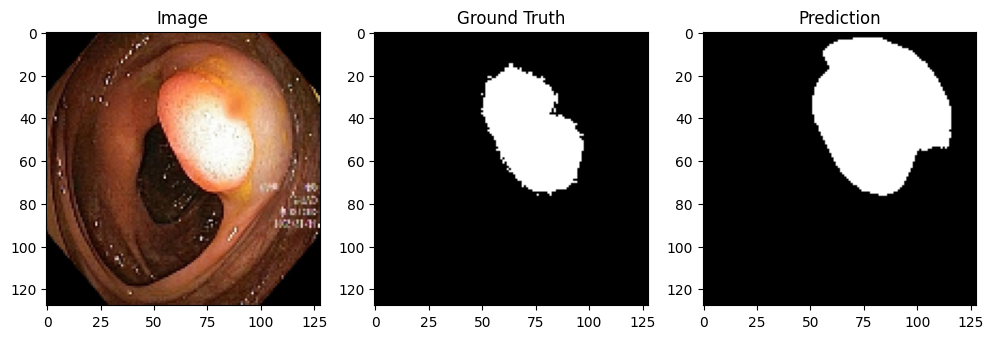

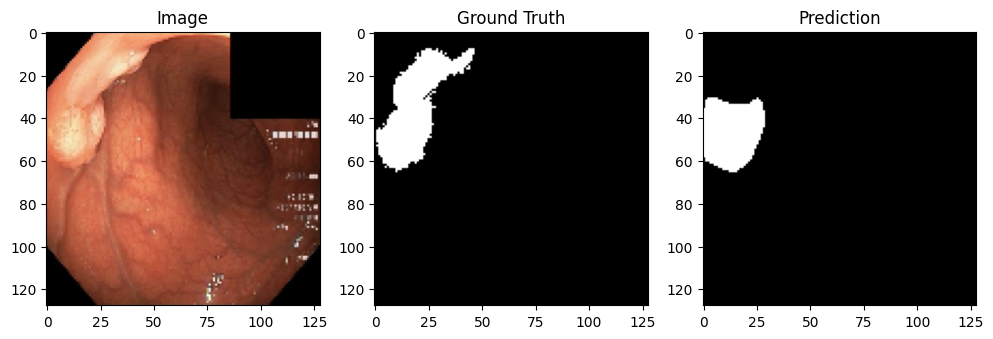

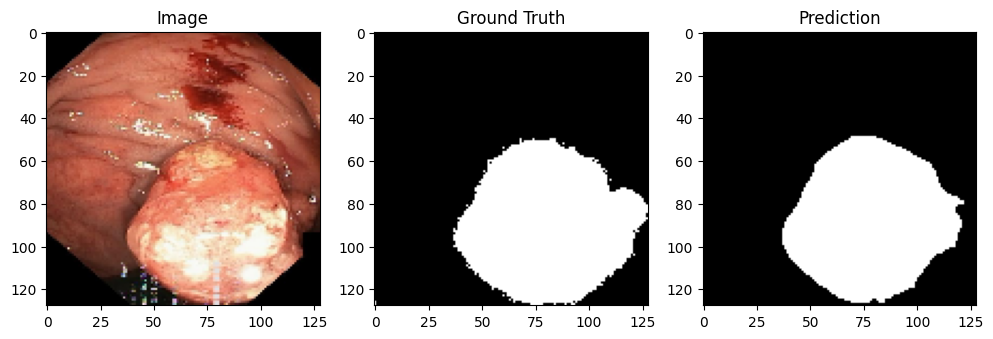

In [ ]:
model.eval()
images, masks, _ = next(iter(val_loader))
images = images.to(device)
with torch.no_grad():
    preds, _ = model(images, lambda_=1.0)
preds = (preds > 0.5).float().cpu()

import matplotlib.pyplot as plt
for i in range(3):
    plt.figure(figsize=(12,4))
    plt.subplot(1,3,1)
    plt.imshow(images[i].cpu().permute(1,2,0)*0.5+0.5)  # unnormalize
    plt.title("Image")
    plt.subplot(1,3,2)
    plt.imshow(masks[i][0].cpu(), cmap='gray')
    plt.title("Ground Truth")
    plt.subplot(1,3,3)
    plt.imshow(preds[i][0], cmap='gray')
    plt.title("Prediction")
    plt.show()

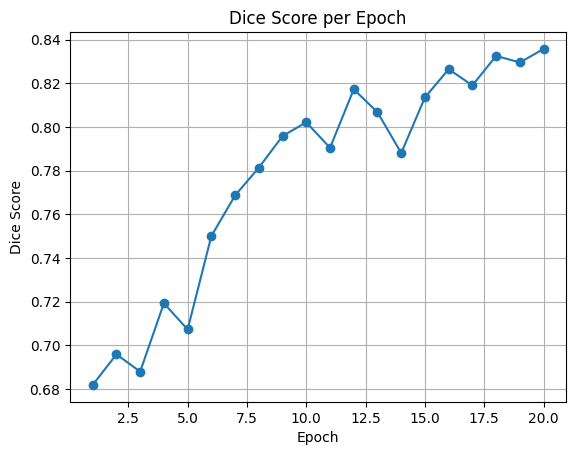

In [ ]:
# Example after training loop
import matplotlib.pyplot as plt

epochs = list(range(1, 21))
dice_scores = [0.6819, 0.6959, 0.6880, 0.7193, 0.7073, 0.7501, 0.7687, 0.7814, 0.7959, 0.8022, 0.7905, 0.8173, 0.8068, 0.7881, 0.8136, 0.8265, 0.8191, 0.8326, 0.8296, 0.8358]

plt.plot(epochs, dice_scores, marker='o')
plt.xlabel('Epoch')
plt.ylabel('Dice Score')
plt.title('Dice Score per Epoch')
plt.grid()
plt.show()


In [ ]:
def compute_metrics(loader, model, lambda_=1.0):
    model.eval()
    tp, tn, fp, fn = 0, 0, 0, 0
    total_time = 0
    total_samples = 0

    with torch.no_grad():
        for images, masks, _ in loader:
            images, masks = images.to(device), masks.to(device)

            start_time = time.time()
            seg_out, _ = model(images, lambda_)
            end_time = time.time()

            preds = (seg_out > 0.5).float()

            tp += ((preds == 1) & (masks == 1)).sum().item()
            tn += ((preds == 0) & (masks == 0)).sum().item()
            fp += ((preds == 1) & (masks == 0)).sum().item()
            fn += ((preds == 0) & (masks == 1)).sum().item()

            total_time += (end_time - start_time)
            total_samples += images.shape[0]

    precision = tp / (tp + fp + 1e-8)
    recall = tp / (tp + fn + 1e-8)
    f2 = (5 * precision * recall) / (4 * precision + recall + 1e-8)
    accuracy = (tp + tn) / (tp + tn + fp + fn + 1e-8)
    fps = total_samples / total_time

    return precision, recall, f2, accuracy, fps


In [ ]:
precision, recall, f2, accuracy, fps = compute_metrics(val_loader, model, lambda_=1.0)
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F2 Score: {f2:.4f}")
print(f"Accuracy: {accuracy:.4f}")
print(f"FPS: {fps:.2f}")


Precision: 0.8362
Recall: 0.8198
F2 Score: 0.8230
Accuracy: 0.9480
FPS: 452.17
